In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
data=pd.read_csv('C:/Users/Admin/Desktop/3rd sem/auto-mpg.csv')

In [14]:
print(data.head())
print(data.index)
print(data.columns)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model yea

In [4]:
data.shape

(398, 9)

In [60]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [8]:
#cleaning the data


horsepower_missing_ind = data[data.horsepower=='?'].index
data.loc[horsepower_missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
data.loc[horsepower_missing_ind, 'horsepower'] = float('nan')
data.horsepower = data.horsepower.apply(pd.to_numeric)
data.loc[horsepower_missing_ind, 'horsepower'] = int( data.horsepower.mean() )


In [10]:
pd.set_option('precision', 2)
# display stats of the features
data.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.83,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [11]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

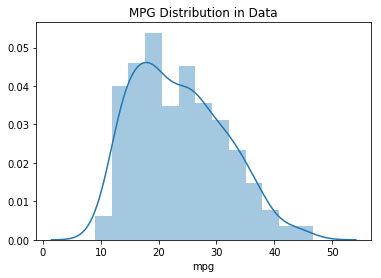

In [12]:
# Exploratory Data Analysis

sns.distplot(data['mpg']);
plt.title('MPG Distribution in Data')
plt.show()

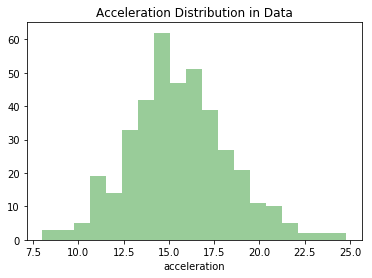

In [13]:
sns.distplot(data['acceleration'], hist=True, kde=False, color='green')
plt.title('Acceleration Distribution in Data')
plt.show()

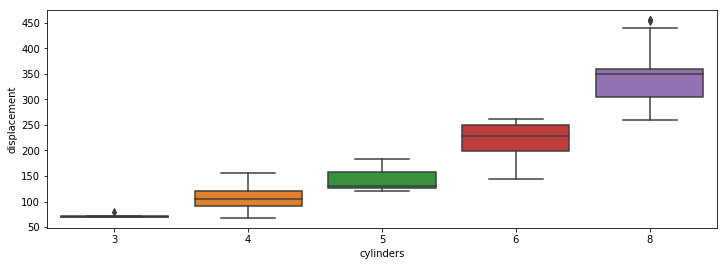

In [14]:
plt.figure(figsize=(12,4))
sns.boxplot(x='cylinders',y='displacement', data=data)
plt.show()

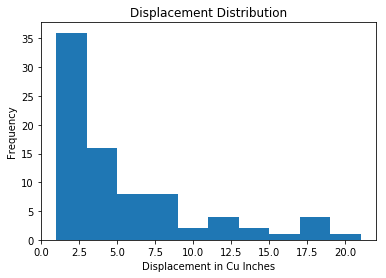

In [15]:
data['displacement'].value_counts().plot(kind='hist');
plt.xlabel('Displacement in Cu Inches')
plt.title('Displacement Distribution')
plt.show()

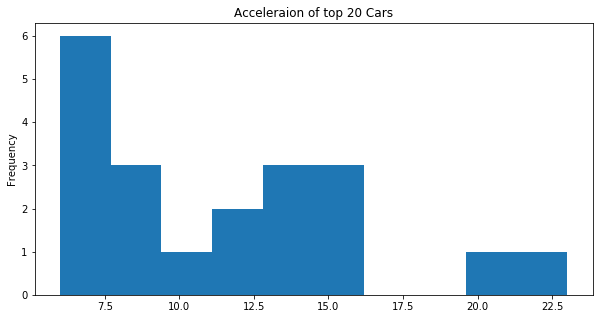

In [16]:
plt.figure(figsize=(10,5))
data['acceleration'].value_counts().head(20).plot(kind='hist', title='Acceleraion of top 20 Cars');


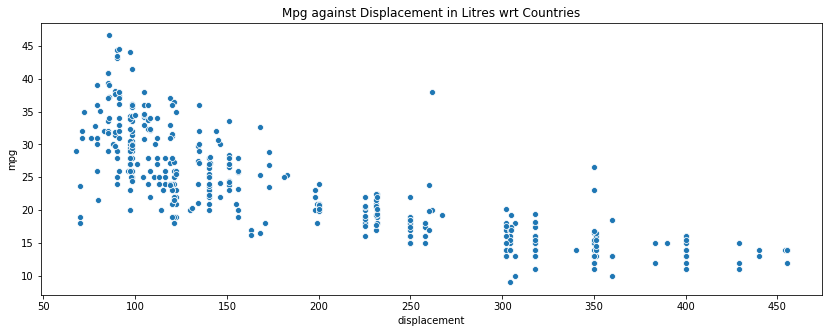

In [71]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='displacement', y='mpg', data=data)
plt.title('Mpg against Displacement in Litres wrt Countries')
plt.show()

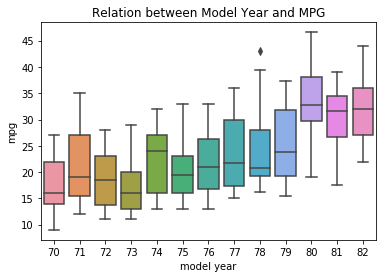

In [18]:
sns.boxplot(x='model year',y='mpg',data=data);
plt.title('Relation between Model Year and MPG')
plt.show()

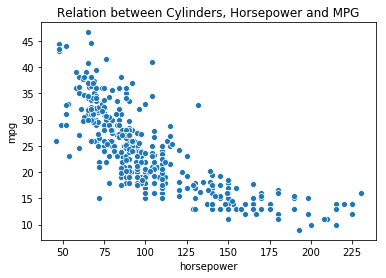

In [73]:
sns.scatterplot(x='horsepower', y='mpg', data=data);
plt.title('Relation between Cylinders, Horsepower and MPG')
plt.show()


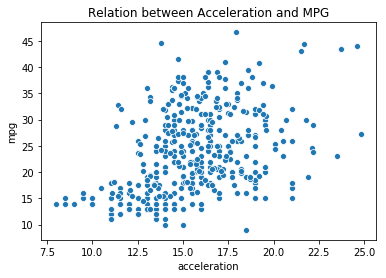

In [19]:
sns.scatterplot(x='acceleration', y='mpg', data=data);
plt.title('Relation between Acceleration and MPG')
plt.show()

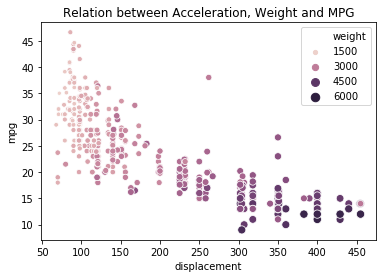

In [75]:
sns.scatterplot(x='displacement', y='mpg',size='weight', hue='weight', data=data)
plt.title('Relation between Acceleration, Weight and MPG')
plt.show()

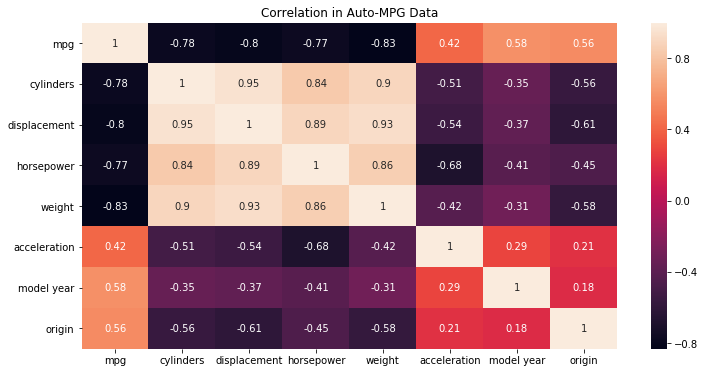

In [20]:
cor = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True)
plt.title('Correlation in Auto-MPG Data')
plt.show()

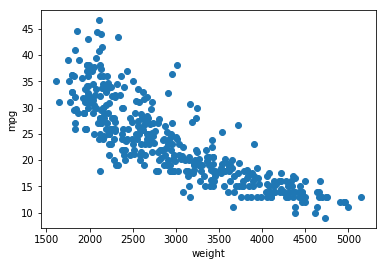

In [21]:
plt.scatter(x=data['weight'], y=data['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()



In [22]:
data.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [23]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [24]:
y=data.iloc[:, [0]].values 
x=data.iloc[:,[1,2,4,5,6,7]].values

In [25]:
from sklearn.preprocessing import StandardScaler
x_s=StandardScaler()
y_s=StandardScaler()

In [26]:
x=x_s.fit_transform(x)
y=y_s.fit_transform(y)

In [27]:
#model fitting
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [29]:
reg.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
reg.score(xtrain,ytrain)

0.8332146732909674

In [31]:
y_p=reg.predict(xtest)

In [32]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(ytest,y_p)

In [33]:
error

0.19643244170130825

In [34]:
#finding the model fittness

reg.score(x,y)

0.8189882619669966

In [35]:
reg.score(xtrain,ytrain)

0.8332146732909674

In [38]:
reg.score(xtest,ytest)

0.7783650593133282